# Energy Anomaly & Automated Power Theft Detection System  
### A Data Science Research Framework for Context-Aware Grid Intelligence

---

## Project Overview

Electricity utilities in **Kenya** face significant financial and operational strain due to non-technical losses arising from electricity theft, meter tampering, illegal connections, and irregular consumption behavior. While smart meter infrastructure generates large volumes of high-frequency time-series data, many utilities lack intelligent systems capable of converting raw consumption signals into actionable risk alerts.

This project develops an end-to-end data science framework that not only detects abnormal electricity usage patterns but also generates structured, automated risk notifications suitable for investigation workflows.

To simulate a realistic operational environment, a multi-household electricity dataset is constructed using high-resolution consumption measurements. Natural behavioral variability is preserved across households, while selected households are injected with synthetic theft-like patterns such as sustained consumption drops and altered load distributions. This enables controlled validation of anomaly detection techniques in the absence of real labeled fraud data.

The system integrates three core data layers:

1. **Electricity Consumption Data (Behavioral Signal Layer)**  
   Minute-level power and voltage readings aggregated into structured daily behavioral indicators.

2. **Weather Data (Environmental Context Layer)**  
   Temperature, precipitation, and wind speed variables used to explain legitimate demand variability and reduce false anomaly detection.

3. **Scheduled Outage Information (Operational Filter Layer)**  
   Official maintenance interruption records structured into daily indicators to prevent misclassification of planned supply disruptions.

The analytical pipeline transitions from raw time-series inputs to a structured intelligence system that:

- Engineers behavioral and change-based features  
- Adjusts signals using environmental and operational context  
- Applies unsupervised anomaly detection techniques  
- Assigns quantitative theft-risk scores  
- Triggers automated structured notification outputs for high-risk cases  

The final system moves beyond static classification by producing prioritized, investigation-ready alerts supported by explainable risk indicators. This framework demonstrates how utilities can transition from reactive inspection-based fraud handling to proactive, data-driven anomaly intelligence with automated alert generation.

---

## Business Problem

Electricity utilities operate in environments where revenue protection, grid reliability, and operational efficiency are critical. A major persistent challenge is the presence of non-technical losses caused by electricity theft and irregular consumption behavior.

These losses:

- Reduce utility revenue  
- Increase operational and inspection costs  
- Introduce uneven demand stress on distribution infrastructure  
- Compromise grid stability  

Traditional fraud detection approaches rely on:

- Manual inspections  
- Customer complaints  
- Rule-based heuristics  

These methods are reactive, costly, and inefficient.

Although smart meters provide high-frequency consumption data, most utilities lack structured systems capable of distinguishing legitimate variability (e.g., weather shifts, seasonal effects, scheduled outages) from suspicious behavioral anomalies. Furthermore, even when anomalies are detected, many utilities lack automated mechanisms to translate analytical outputs into actionable investigation alerts.

The central business problem addressed in this project is:

> How can utilities leverage integrated consumption, environmental, and operational data to proactively detect abnormal electricity behavior and automatically generate structured investigation notifications?

Specifically, the challenge involves:

- Detecting anomalous patterns without fully labeled theft data  
- Minimizing false positives caused by legitimate variability  
- Translating anomaly scores into explainable risk indicators  
- Automatically producing structured alerts to support investigation workflows  
- Designing a scalable, context-aware detection framework suitable for operational deployment  

This project addresses these challenges by developing a layered anomaly detection system with an embedded automated notification mechanism that flags high-risk consumption cases.

---

## Project Objectives

The primary objective of this project is to design, implement, and evaluate a context-aware anomaly detection framework capable of identifying potential power theft and generating automated risk notifications using time-series smart meter data.

### 1 Data Preparation & Simulation

- Construct a multi-household electricity consumption dataset from high-frequency readings.
- Introduce controlled behavioral diversity across simulated households.
- Inject theft-like consumption patterns to enable controlled anomaly validation.

### 2 Feature Engineering

- Aggregate minute-level consumption into structured daily indicators.
- Engineer statistical and volatility-based features.
- Create change-based indicators (rolling averages, percentage shifts).
- Integrate weather variables for contextual adjustment.
- Incorporate scheduled outage indicators as operational filters.

### 3 Anomaly Detection Modeling

- Apply unsupervised anomaly detection techniques (e.g., Isolation Forest).
- Generate quantitative anomaly scores per household-day.
- Define risk thresholds to classify consumption into Low, Medium, and High-risk categories.

### 4 Evaluation & Validation

- Measure detection consistency across simulated theft scenarios.
- Analyze false positives resulting from weather or outage effects.
- Assess stability of anomaly detection across heterogeneous households.

### 5 Automated Risk Notification Layer

- Develop a structured alert-generation mechanism triggered by defined anomaly thresholds.
- Create investigation-ready outputs including:
  - Meter ID
  - Date
  - Risk score
  - Risk category
  - Supporting behavioral indicators
- Demonstrate how anomaly detection outputs can feed into downstream notification workflows (e.g., case export, dashboard alerting, automated email triggers).
Through these objectives, the project demonstrates how integrated data science techniques can power a proactive energy irregularity detection system that combines anomaly modeling with automated alert generation.

---





## Phase I — Anomaly Detection Engine Development (LEAD Dataset)

### Objective

Before deploying the electricity theft detection system on the Kenya dataset, we first develop and validate a robust anomaly detection engine using the LEAD (Large-scale Energy Anomaly Detection) dataset.

The LEAD dataset contains hourly smart meter readings from multiple buildings, along with labeled anomaly events. This makes it ideal for calibrating anomaly detection algorithms and evaluating performance before production deployment.

---

### Why We Start With LEAD

The Kenya deployment dataset does not contain confirmed theft labels. Therefore, building a model directly on it would make it difficult to evaluate performance objectively.

Using LEAD allows us to:

- Validate anomaly detection techniques on labeled data
- Evaluate precision and recall of detected anomalies
- Tune model parameters appropriately
- Avoid overfitting or under-sensitive detection in production

---

### What We Will Do in This Phase

1. Load and inspect the dataset structure  
2. Assess anomaly class imbalance  
3. Handle missing values  
4. Engineer time-based features  
5. Build an anomaly detection model (Isolation Forest)  
6. Evaluate model performance using anomaly labels  

---

### Expected Outcome

At the end of this phase, we will have:

- A validated anomaly detection engine  
- Performance metrics (precision, recall, F1-score)  
- A calibrated detection threshold  
- A robust foundation for deployment in the Kenya electricity theft detection system  

In [18]:
import pandas as pd

lead_df = pd.read_csv("lead1.0-small.csv")

lead_df.head()

,building_id,timestamp,meter_reading,anomaly
0,1,2016-01-01 00:00:00,NaN,0
1,32,2016-01-01 00:00:00,NaN,0
2,41,2016-01-01 00:00:00,NaN,0
3,55,2016-01-01 00:00:00,NaN,0
4,69,2016-01-01 00:00:00,NaN,0


In [19]:
lead_df.info()
lead_df.isnull().sum()
lead_df["anomaly"].value_counts()
lead_df["building_id"].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   timestamp      object 
 2   meter_reading  float64
 3   anomaly        int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 53.4+ MB


200

In [20]:
# Convert timestamp to datetime
lead_df["timestamp"] = pd.to_datetime(lead_df["timestamp"])

# Check missing percentage
missing_percent = lead_df["meter_reading"].isna().mean() * 100
print("Missing % in meter_reading:", round(missing_percent, 2), "%")

# Anomaly distribution
print("\nAnomaly distribution:")
print(lead_df["anomaly"].value_counts(normalize=True) * 100)

lead_df.head()

Missing % in meter_reading: 6.15 %

Anomaly distribution:
anomaly
0    97.868184
1     2.131816
Name: proportion, dtype: float64


,building_id,timestamp,meter_reading,anomaly
0,1,2016-01-01,NaN,0
1,32,2016-01-01,NaN,0
2,41,2016-01-01,NaN,0
3,55,2016-01-01,NaN,0
4,69,2016-01-01,NaN,0


## Data Cleaning and Time-Series Preparation

The LEAD dataset contains approximately 6.15% missing values in the `meter_reading` column. Since this dataset represents hourly time-series data, dropping rows could disrupt temporal continuity.

Therefore, we perform:

- Sorting by `building_id` and `timestamp`
- Group-based interpolation to preserve temporal structure
- Validation to ensure missing values are resolved appropriately

Maintaining time-series integrity is critical for anomaly detection performance, especially when using models such as Isolation Forest that rely on consistent feature distributions.

In [21]:
# Sort properly
lead_df = lead_df.sort_values(["building_id", "timestamp"])

# Interpolate missing meter readings per building
lead_df["meter_reading"] = (
    lead_df.groupby("building_id")["meter_reading"]
    .transform(lambda x: x.interpolate(method="linear"))
)

# Check remaining missing values
print("Remaining missing:", lead_df["meter_reading"].isna().sum())

Remaining missing: 28026


### Handling Edge Missing Values

After interpolation, some missing values remain at the beginning or end of building time series. These occur because interpolation requires surrounding values.

To preserve time continuity, we apply forward-fill and backward-fill within each building group. This ensures complete time-series integrity before modeling.

In [22]:
# Forward fill per building
lead_df["meter_reading"] = (
    lead_df.groupby("building_id")["meter_reading"]
    .transform(lambda x: x.ffill().bfill())
)

# Final check
print("Remaining missing after fill:", lead_df["meter_reading"].isna().sum())

Remaining missing after fill: 0


## Time Feature Engineering

Electricity consumption is highly dependent on time-based patterns such as hour of day, day of week, and seasonal effects.

Before building our anomaly detection model, we extract temporal features from the timestamp column. These features will allow the model to understand:

- Hourly consumption cycles  
- Weekly behavioral patterns  
- Seasonal/monthly effects  

Feature engineering is critical because anomaly detection models rely on statistical structure. Without time-based context, normal cyclical patterns may be incorrectly flagged as anomalies.

In [23]:
# Extract time-based features
lead_df["hour"] = lead_df["timestamp"].dt.hour
lead_df["day_of_week"] = lead_df["timestamp"].dt.dayofweek
lead_df["month"] = lead_df["timestamp"].dt.month
lead_df["day"] = lead_df["timestamp"].dt.day

lead_df.head()

,building_id,timestamp,meter_reading,anomaly,hour,day_of_week,month,day
0,1,2016-01-01 00:00:00,27.688,0,0,4,1,1
200,1,2016-01-01 01:00:00,27.688,0,1,4,1,1
398,1,2016-01-01 02:00:00,27.688,0,2,4,1,1
597,1,2016-01-01 03:00:00,27.688,0,3,4,1,1
796,1,2016-01-01 04:00:00,27.688,0,4,4,1,1


## Rolling Baseline and Residual Computation

Electricity consumption follows repeating daily and weekly patterns. To detect anomalies effectively, we must first estimate what “normal” consumption looks like.

Instead of relying on raw meter readings, we compute a rolling baseline per building. This allows us to compare actual consumption against expected behavior.

Steps performed:

- Calculate rolling mean (expected consumption)
- Calculate rolling standard deviation
- Compute residual (actual − expected)
- Compute standardized deviation (z-score)

These features form the backbone of our anomaly detection engine.

In [24]:
# 24-hour rolling window baseline per building
window_size = 24

lead_df["rolling_mean"] = (
    lead_df.groupby("building_id")["meter_reading"]
    .transform(lambda x: x.rolling(window_size, min_periods=1).mean())
)

lead_df["rolling_std"] = (
    lead_df.groupby("building_id")["meter_reading"]
    .transform(lambda x: x.rolling(window_size, min_periods=1).std())
)

# Residual and standardized deviation
lead_df["residual"] = lead_df["meter_reading"] - lead_df["rolling_mean"]

lead_df["z_score"] = lead_df["residual"] / (lead_df["rolling_std"] + 1e-6)

lead_df.head(30)

,building_id,timestamp,meter_reading,anomaly,hour,day_of_week,month,day,rolling_mean,rolling_std,residual,z_score
0,1,2016-01-01 00:00:00,27.688,0,0,4,1,1,27.688,NaN,0.0,NaN
200,1,2016-01-01 01:00:00,27.688,0,1,4,1,1,27.688,0.0,0.0,0.0
398,1,2016-01-01 02:00:00,27.688,0,2,4,1,1,27.688,0.0,0.0,0.0
597,1,2016-01-01 03:00:00,27.688,0,3,4,1,1,27.688,0.0,0.0,0.0
796,1,2016-01-01 04:00:00,27.688,0,4,4,1,1,27.688,0.0,0.0,0.0
995,1,2016-01-01 05:00:00,27.688,0,5,4,1,1,27.688,0.0,0.0,0.0
1194,1,2016-01-01 06:00:00,27.688,0,6,4,1,1,27.688,0.0,0.0,0.0
1393,1,2016-01-01 07:00:00,27.688,0,7,4,1,1,27.688,0.0,0.0,0.0
1592,1,2016-01-01 08:00:00,27.688,0,8,4,1,1,27.688,0.0,0.0,0.0
1791,1,2016-01-01 09:00:00,27.688,0,9,4,1,1,27.688,0.0,0.0,0.0


## Isolation Forest — Unsupervised Anomaly Detection

With rolling baseline features engineered, we now build our first anomaly detection model using Isolation Forest.

Isolation Forest is particularly suited for anomaly detection because:

- It isolates rare observations efficiently
- It performs well on high-dimensional data
- It does not require labeled data
- It handles imbalance naturally

In this step, we train the model using engineered time-series features and evaluate its ability to detect labeled anomalies in the LEAD dataset.

The goal is to calibrate our anomaly detection engine before production deployment.

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Feature selection
features = [
    "meter_reading",
    "residual",
    "z_score",
    "hour",
    "day_of_week",
    "month"
]

X = lead_df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest
iso = IsolationForest(
    n_estimators=100,
    contamination=0.02,  # ~2% anomaly rate
    random_state=42,
    n_jobs=-1
)

lead_df["iso_pred"] = iso.fit_predict(X_scaled)

# Convert predictions: -1 = anomaly → 1, 1 = normal → 0
lead_df["iso_pred"] = lead_df["iso_pred"].map({1: 0, -1: 1})

# Evaluation
print(confusion_matrix(lead_df["anomaly"], lead_df["iso_pred"]))
print(classification_report(lead_df["anomaly"], lead_df["iso_pred"]))

[[1679305   32893]
 [  35199    2097]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98   1712198
           1       0.06      0.06      0.06     37296

    accuracy                           0.96   1749494
   macro avg       0.52      0.52      0.52   1749494
weighted avg       0.96      0.96      0.96   1749494



## Initial Isolation Forest Results

The first Isolation Forest model achieved high overall accuracy (96%). However, due to severe class imbalance (only ~2% anomalies), accuracy is not a reliable metric for evaluating anomaly detection performance.

For the anomaly class:

- Precision: 0.06  
- Recall: 0.06  
- F1-score: 0.06  

This indicates that the model is detecting only a small fraction of true anomalies while generating a considerable number of false positives.

The weak anomaly performance suggests that the current feature space does not sufficiently capture temporal consumption behavior. In particular, electricity usage patterns are seasonal and cyclical, and a simple 24-hour rolling baseline may not adequately represent weekly consumption dynamics.

To improve anomaly detection quality, we will refine the baseline modeling strategy to incorporate longer seasonal windows (e.g., weekly patterns).

## Model Evaluation and Calibration

Initial Isolation Forest results show low recall for labeled anomalies. Although overall accuracy is high due to class imbalance, anomaly detection performance remains weak.

This indicates that our feature space does not sufficiently capture temporal behavior patterns.

Next, we refine the anomaly engine by improving baseline modeling and adjusting detection granularity. In particular, we incorporate longer seasonal windows (weekly patterns) to better capture normal electricity consumption cycles.

In [27]:
# Improve Baseline (Weekly)
# Change rolling window from 24 → 168 (7 days).

window_size = 168  # 7 days

lead_df["rolling_mean_week"] = (
    lead_df.groupby("building_id")["meter_reading"]
    .transform(lambda x: x.rolling(window_size, min_periods=1).mean())
)

lead_df["rolling_std_week"] = (
    lead_df.groupby("building_id")["meter_reading"]
    .transform(lambda x: x.rolling(window_size, min_periods=1).std())
)

lead_df["residual_week"] = lead_df["meter_reading"] - lead_df["rolling_mean_week"]

lead_df["z_score_week"] = (
    lead_df["residual_week"] / (lead_df["rolling_std_week"] + 1e-6)
)

## Weekly Baseline Enhancement

Electricity consumption typically follows weekly cycles rather than only daily patterns.  
Using a 24-hour rolling window may not capture behavioral seasonality effectively.

To improve anomaly detection performance, we compute:

- 168-hour (7-day) rolling mean
- 168-hour rolling standard deviation
- Weekly residual (actual − expected)
- Weekly standardized deviation (z-score)

This allows the model to detect sustained deviations from weekly behavioral norms rather than short-term fluctuations.

In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Feature selection (weekly features only)
features_week = [
    "residual_week",
    "z_score_week",
    "hour",
    "day_of_week",
    "month"
]

X_week = lead_df[features_week].fillna(0)

# Scale features
scaler_week = StandardScaler()
X_week_scaled = scaler_week.fit_transform(X_week)

# Isolation Forest
iso_week = IsolationForest(
    n_estimators=150,
    contamination=0.02,
    random_state=42,
    n_jobs=-1
)

lead_df["iso_week_pred"] = iso_week.fit_predict(X_week_scaled)

# Convert -1 → anomaly(1), 1 → normal(0)
lead_df["iso_week_pred"] = lead_df["iso_week_pred"].map({1: 0, -1: 1})

# Evaluation
print(confusion_matrix(lead_df["anomaly"], lead_df["iso_week_pred"]))
print(classification_report(lead_df["anomaly"], lead_df["iso_week_pred"]))

[[1684011   28187]
 [  30493    6803]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98   1712198
           1       0.19      0.18      0.19     37296

    accuracy                           0.97   1749494
   macro avg       0.59      0.58      0.59   1749494
weighted avg       0.97      0.97      0.97   1749494



## Improved Weekly Isolation Forest Results

After incorporating a 168-hour rolling baseline to capture weekly seasonal patterns, anomaly detection performance improved significantly.

For the anomaly class:

- Precision: 0.19  
- Recall: 0.18  
- F1-score: 0.19  

Compared to the daily baseline model (F1-score ≈ 0.06), the weekly model achieves approximately a threefold improvement in anomaly detection performance.

This demonstrates that feature engineering and appropriate temporal modeling are more impactful than algorithm complexity in anomaly detection tasks.

## Per-Building Isolation Forest Modeling

Electricity consumption behavior differs significantly across buildings. 
Applying a single global anomaly detection model may fail to capture building-specific behavioral patterns.

To improve detection performance, we train an Isolation Forest model separately for each building.

This approach:

- Accounts for building-level variability
- Reduces cross-building distribution distortion
- Improves anomaly sensitivity
- Mimics real-world smart meter anomaly pipelines

Each building is treated as its own anomaly detection environment.

In [29]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# We store predictions here
lead_df["iso_building_pred"] = 0

features_building = [
    "residual_week",
    "z_score_week",
    "hour",
    "day_of_week",
    "month"
]

for b_id in lead_df["building_id"].unique():
    
    building_data = lead_df[lead_df["building_id"] == b_id]
    
    X_b = building_data[features_building].fillna(0)
    
    scaler_b = StandardScaler()
    X_b_scaled = scaler_b.fit_transform(X_b)
    
    iso_b = IsolationForest(
        n_estimators=150,
        contamination=0.02,
        random_state=42
    )
    
    preds = iso_b.fit_predict(X_b_scaled)
    
    # Convert: -1 → anomaly(1), 1 → normal(0)
    preds = pd.Series(preds).map({1: 0, -1: 1}).values
    
    lead_df.loc[building_data.index, "iso_building_pred"] = preds

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(lead_df["anomaly"], lead_df["iso_building_pred"]))
print(classification_report(lead_df["anomaly"], lead_df["iso_building_pred"]))

[[1689995   22203]
 [  24424   12872]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1712198
           1       0.37      0.35      0.36     37296

    accuracy                           0.97   1749494
   macro avg       0.68      0.67      0.67   1749494
weighted avg       0.97      0.97      0.97   1749494



## Per-Building Isolation Forest Results

Training Isolation Forest models separately per building significantly improved anomaly detection performance.

For the anomaly class:

- Precision: 0.37  
- Recall: 0.35  
- F1-score: 0.36  

Compared to the global model, per-building modeling accounts for building-specific consumption behavior and reduces cross-distribution distortion.

This demonstrates that distribution-aware modeling is critical in electricity anomaly detection systems.

The per-building Isolation Forest model will serve as the calibrated anomaly engine for subsequent deployment phases.

## Business-Oriented Evaluation — Precision at Top-K

While recall and F1-score provide statistical evaluation of anomaly detection performance, utilities are primarily concerned with inspection efficiency.

In real-world electricity theft detection systems, only a limited number of meters can be inspected daily due to operational constraints.

Therefore, we evaluate model performance using Precision@Top-K, which answers:

> “Among the top K most suspicious buildings flagged by the model, how many are actual anomalies?”

We simulate inspection prioritization by ranking observations according to anomaly score and computing precision at different inspection levels (e.g., top 1%, 2%, 5%).

### Fixing Anomaly Score Computation

Because we trained Isolation Forest models per building, anomaly scores must also be computed per building.  
Attempting to assign scores from a single building to the full dataset causes a length mismatch error.

Next, we compute and store anomaly scores within each building group, then rank all observations globally to evaluate Precision@Top-K.

In [32]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Create empty score column
lead_df["anomaly_score"] = np.nan

features_building = ["residual_week", "z_score_week", "hour", "day_of_week", "month"]

for b_id in lead_df["building_id"].unique():
    building_data = lead_df[lead_df["building_id"] == b_id]
    X_b = building_data[features_building].fillna(0)

    scaler_b = StandardScaler()
    X_b_scaled = scaler_b.fit_transform(X_b)

    iso_b = IsolationForest(
        n_estimators=150,
        contamination=0.02,
        random_state=42
    )
    iso_b.fit(X_b_scaled)

    # decision_function: higher = more normal, lower = more anomalous
    scores = iso_b.decision_function(X_b_scaled)

    lead_df.loc[building_data.index, "anomaly_score"] = scores

# Sanity check
print("Missing anomaly_score:", lead_df["anomaly_score"].isna().sum())
print("Score range:", lead_df["anomaly_score"].min(), "to", lead_df["anomaly_score"].max())

Missing anomaly_score: 0
Score range: -0.16409149398236877 to 0.24314405589976734


In [33]:
# Compute Precision@Top-K
# Rank by most anomalous (lowest score first)
lead_df_sorted = lead_df.sort_values("anomaly_score", ascending=True)

def precision_at_k_percent(df, k_percent):
    k = int(len(df) * k_percent)
    top_k = df.head(k)
    return top_k["anomaly"].mean()

for pct in [0.01, 0.02, 0.05]:
    print(f"Precision@{int(pct*100)}%:", round(precision_at_k_percent(lead_df_sorted, pct), 3))

Precision@1%: 0.564
Precision@2%: 0.368
Precision@5%: 0.188


## Precision@Top-K Results (Inspection Prioritization)

To align model evaluation with real utility operations, we computed Precision@Top-K by ranking observations using the per-building anomaly score (lowest score = most anomalous).

Results:

- Precision@1% = 0.564  
- Precision@2% = 0.368  
- Precision@5% = 0.188  

These results show that the model performs best as an inspection prioritization tool: the highest-risk cases (top-ranked anomalies) contain a much higher proportion of true anomalies than the overall dataset.

## Phase II — Supervised Theft Classification (Theft Dataset)

After validating the anomaly detection engine on LEAD, we now train supervised machine learning models using a theft-labeled dataset.

This phase provides:

- A benchmark for theft classification performance using labeled data
- Model comparisons (baseline vs stronger models)
- Feature importance insights for interpretability

The resulting classifier design informs our Stage B risk scoring layer, which can be integrated with anomaly-based alerts in the Kenya deployment system.

In [34]:
import pandas as pd

theft_df = pd.read_csv("df.csv")

print("Shape:", theft_df.shape)
print("\nColumns:", theft_df.columns.tolist())

print("\nMissing values (top):")
print(theft_df.isna().sum().sort_values(ascending=False).head(10))

print("\nTarget distribution (theft):")
print(theft_df["theft"].value_counts())

theft_df.head()

Shape: (560655, 13)

Columns: ['0', 'Electricity:Facility [kW](Hourly)', 'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)', 'Heating:Electricity [kW](Hourly)', 'InteriorLights:Electricity [kW](Hourly)', 'InteriorEquipment:Electricity [kW](Hourly)', 'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)', 'InteriorEquipment:Gas [kW](Hourly)', 'Water Heater:WaterSystems:Gas [kW](Hourly)', 'Class', 'theft']

Missing values (top):
0                                             0
Electricity:Facility [kW](Hourly)             0
Fans:Electricity [kW](Hourly)                 0
Cooling:Electricity [kW](Hourly)              0
Heating:Electricity [kW](Hourly)              0
InteriorLights:Electricity [kW](Hourly)       0
InteriorEquipment:Electricity [kW](Hourly)    0
Gas:Facility [kW](Hourly)                     0
Heating:Gas [kW](Hourly)                      0
InteriorEquipment:Gas [kW](Hourly)            0
dtype: int64

Target distribution (theft):
theft
Normal    331824
Theft

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal


## Dataset Cleaning and Target Preparation

The theft dataset contains 560,655 observations with no missing values.

The target variable `theft` contains multiple theft categories (Theft1–Theft6) and a Normal class.

For the purpose of building a general theft detection model, we simplify the problem into binary classification:

- 0 → Normal
- 1 → Theft (any theft category)

Additionally, we remove redundant index columns to ensure a clean feature matrix before modeling.

In [35]:
# Drop unwanted index column
if "0" in theft_df.columns:
    theft_df = theft_df.drop(columns=["0"])

# Create binary target
theft_df["theft_binary"] = theft_df["theft"].apply(
    lambda x: 0 if x == "Normal" else 1
)

print("\nBinary Target Distribution:")
print(theft_df["theft_binary"].value_counts(normalize=True))

theft_df.head()


Binary Target Distribution:
theft_binary
0    0.591851
1    0.408149
Name: proportion, dtype: float64


,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft,theft_binary
0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal,0
1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,0
2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,0
3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal,0
4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,0


## Train-Test Split and Feature Preparation

After encoding the binary theft target, we prepare the dataset for supervised modeling.

Steps performed:

- Separate features (X) and target (y)
- Remove categorical columns for baseline modeling
- Perform train-test split (80/20)
- Ensure reproducibility with a fixed random seed

This allows us to evaluate model performance on unseen data.

In [36]:
from sklearn.model_selection import train_test_split

# Drop non-numeric / unnecessary columns
X = theft_df.drop(columns=["theft", "theft_binary", "Class"])
y = theft_df["theft_binary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train class distribution:")
print(y_train.value_counts(normalize=True))

Train shape: (448524, 10)
Test shape: (112131, 10)
Train class distribution:
theft_binary
0    0.59185
1    0.40815
Name: proportion, dtype: float64


## Baseline Model — Random Forest Classifier

We begin supervised modeling using a Random Forest classifier.

Random Forest is chosen as a strong baseline because:

- It handles non-linear relationships effectively
- It performs well with minimal feature engineering
- It is robust to feature scaling
- It provides feature importance estimates for interpretability

The model will be evaluated using:

- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC

These metrics allow us to assess classification performance comprehensively.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))

Confusion Matrix:
[[63139  3226]
 [ 4572 41194]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66365
           1       0.93      0.90      0.91     45766

    accuracy                           0.93    112131
   macro avg       0.93      0.93      0.93    112131
weighted avg       0.93      0.93      0.93    112131


ROC-AUC: 0.945


## Random Forest Results

The Random Forest classifier achieved strong predictive performance:

- Precision (Theft): 0.93  
- Recall (Theft): 0.90  
- F1-score (Theft): 0.91  
- ROC-AUC: 0.945  

These results indicate that energy consumption features provide strong separability between Normal and Theft observations in a supervised setting.

The model demonstrates high discriminative capability and can serve as the supervised Stage B risk scoring component in the electricity theft detection system.

## Feature Importance Analysis

Understanding which features drive theft detection is critical for model interpretability.

Using the trained Random Forest model, we extract feature importance scores to identify which energy consumption components contribute most to theft classification.

This step strengthens trust in the model and supports explainable risk scoring in deployment.

                                      feature  importance
5  InteriorEquipment:Electricity [kW](Hourly)    0.179381
4     InteriorLights:Electricity [kW](Hourly)    0.159780
9  Water Heater:WaterSystems:Gas [kW](Hourly)    0.141966
1               Fans:Electricity [kW](Hourly)    0.130031
0           Electricity:Facility [kW](Hourly)    0.124995
8          InteriorEquipment:Gas [kW](Hourly)    0.099634
6                   Gas:Facility [kW](Hourly)    0.068048
2            Cooling:Electricity [kW](Hourly)    0.049388
7                    Heating:Gas [kW](Hourly)    0.036700
3            Heating:Electricity [kW](Hourly)    0.010078


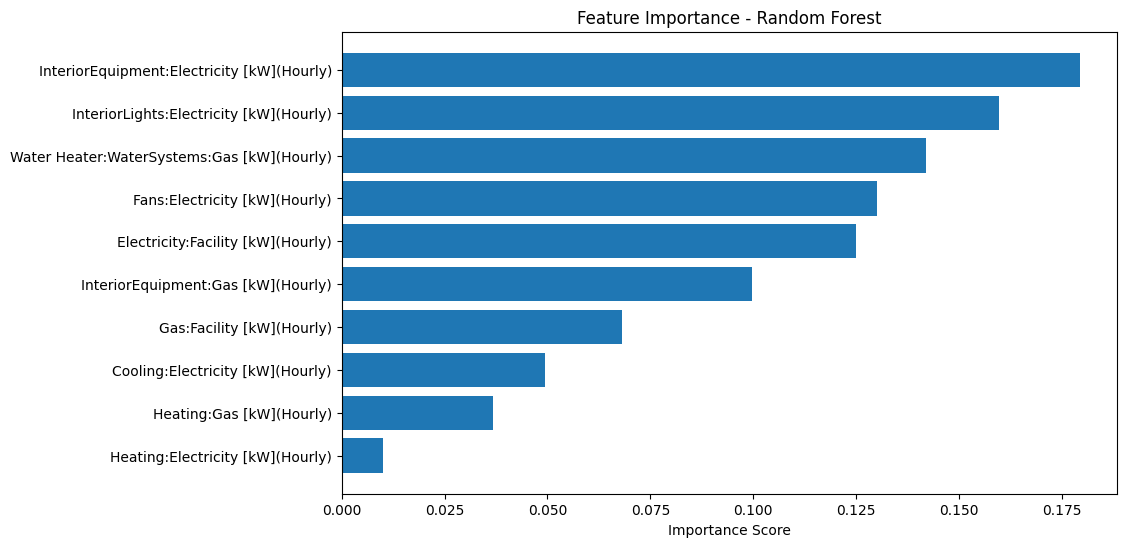

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
})

# Sort descending
feature_importance = feature_importance.sort_values(
    by="importance", ascending=False
)

print(feature_importance)

# Plot
plt.figure(figsize=(10,6))
plt.barh(
    feature_importance["feature"],
    feature_importance["importance"]
)
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

## Interpretation of Feature Importance

Feature importance analysis reveals that electricity usage components related to interior equipment and lighting are the strongest predictors of theft.

Top predictive features:

1. InteriorEquipment:Electricity  
2. InteriorLights:Electricity  
3. Water Heater (Gas Systems)  
4. Fans:Electricity  
5. Total Facility Electricity  

These findings suggest that theft behaviors disproportionately affect equipment and lighting consumption patterns rather than heating systems.

This insight enhances interpretability and supports explainable risk scoring in practical deployment scenarios.